In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math
import warnings
warnings.filterwarnings('ignore')

In [19]:
nvda=pd.read_csv("NVDA.csv", decimal = ',')
nvda['Date']= pd.to_datetime(nvda['Date']) 
nvda['Date']=nvda['Date'].dt.date
#nvda.index = nvda['Date']
nvda.head()

,Date,Open,Close,High,Low,Volume
0,2016-01-04,32.290001,32.369999,32.580002,32.040001,8951900
1,2016-01-05,32.98,32.889999,33.439999,32.5,12256800
2,2016-01-06,32.349998,31.530001,32.5,31.16,11233600
3,2016-01-07,30.74,30.280001,30.950001,29.879999,16132600
4,2016-01-08,30.67,29.629999,30.700001,29.57,9961800


In [20]:
nvda['Open']=nvda['Open'].astype(float)
nvda['Close']=nvda['Close'].astype(float)
nvda['High']=nvda['High'].astype(float)
nvda['Low']=nvda['Low'].astype(float)

In [21]:
'''Feature Engineering'''

nvda['AvgOpen-close']=(nvda['Open']+nvda['Close'])/2
nvda['AvgHigh-low']=(nvda['High']+nvda['Low'])/2
nvda['logValue']=np.log(nvda['Close'])
nvda['Log_of_volume']=np.log(nvda['Volume'])
nvda['All_Total']=(nvda['Open']+nvda['Close']+nvda['High']+nvda['Low'])/4
nvda['Log_Total']=np.log(nvda['All_Total'])
nvda.head()

,Date,Open,Close,High,Low,Volume,AvgOpen-close,AvgHigh-low,logValue,Log_of_volume,All_Total,Log_Total
0,2016-01-04,32.290001,32.369999,32.580002,32.040001,8951900,32.330000,32.310001,3.477232,16.007376,32.320001,3.475686
1,2016-01-05,32.980000,32.889999,33.439999,32.500000,12256800,32.935000,32.970000,3.493169,16.321591,32.952500,3.495067
2,2016-01-06,32.349998,31.530001,32.500000,31.160000,11233600,31.939999,31.830000,3.450940,16.234420,31.885000,3.462136
3,2016-01-07,30.740000,30.280001,30.950001,29.879999,16132600,30.510000,30.415000,3.410487,16.596353,30.462500,3.416496
4,2016-01-08,30.670000,29.629999,30.700001,29.570000,9961800,30.149999,30.135001,3.388787,16.114268,30.142500,3.405936


In [22]:
data=nvda[['Date','AvgOpen-close']]
data.head()

,Date,AvgOpen-close
0,2016-01-04,32.330000
1,2016-01-05,32.935000
2,2016-01-06,31.939999
3,2016-01-07,30.510000
4,2016-01-08,30.149999


These Bands depict the volatility of stock as it increases or decreases. The bands are placed above and below the moving average line of the stocks. The wider the gap between the bands, higher is the degree of volatility.

On the other hand, as the width within the band decreases, lower is the degree of volatility of the stock. At times, the width within the band is constant over a period of time, which shows the constant behavior of a certain stock over that period of time.

## Bollinger Bands with respect to AvgOpen-Close price

In [23]:
data['moving average']=data['AvgOpen-close'].rolling(20).mean()  
data['standard deviation']=data['AvgOpen-close'].rolling(20).std()  
data['upper band']=data['moving average']+data['standard deviation']  
data['lower band']=data['moving average']-data['standard deviation'] 


There are three lines in the Bollinger Band,

1.The middle line with N-period moving average (MA); 20-day SMA

2.An upper band at K times an N-period standard deviation above the moving average; 20-day SMA + (20-day standard deviation of price x 2)

3.A lower band at K times an N-period standard deviation below the moving average; 20-day SMA – (20-day standard deviation of price x 2)

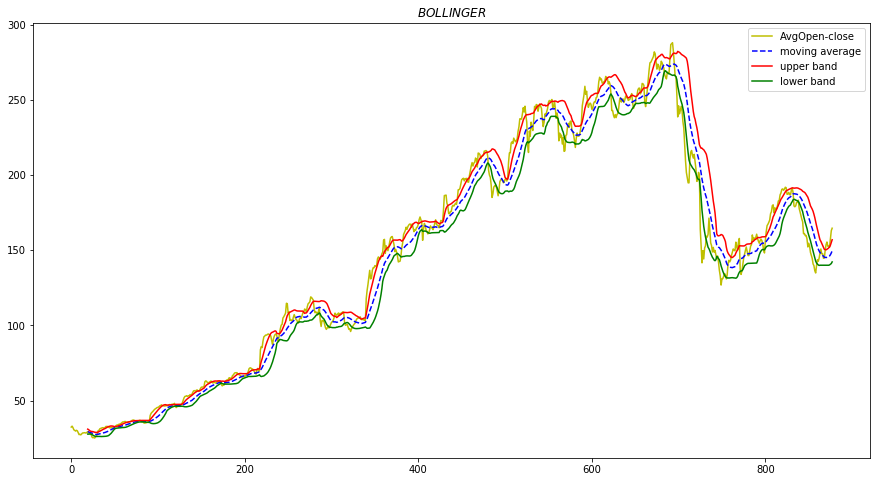

In [24]:
fig = plt.figure(figsize=(15,8))
plt.plot(data['AvgOpen-close'],'y',label = "AvgOpen-close")
plt.plot(data['moving average'],'b--',label = "moving average")
plt.plot(data['upper band'],'r',label = "upper band")
plt.plot(data['lower band'],'g',label = "lower band")
plt.title('$BOLLINGER$')
plt.legend()
plt.show()

In [27]:
data['AvgOpen-close']=np.log(data['AvgOpen-close'])
data['moving average']=data['AvgOpen-close'].rolling(20).mean()  
data['standard deviation']=data['AvgOpen-close'].rolling(20).std()  
data['upper band']=data['moving average']+2*data['standard deviation']  
data['lower band']=data['moving average']-2*data['standard deviation'] 

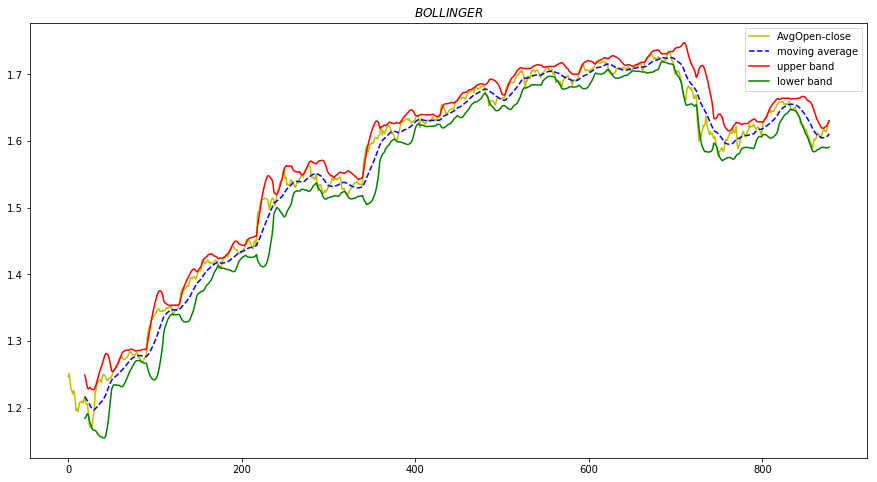

In [28]:
fig = plt.figure(figsize=(15,8))
plt.plot(data['AvgOpen-close'],'y',label = "AvgOpen-close")
plt.plot(data['moving average'],'b--',label = "moving average")
plt.plot(data['upper band'],'r',label = "upper band")
plt.plot(data['lower band'],'g',label = "lower band")
plt.title('$BOLLINGER$')
plt.legend()
plt.show()

In [25]:
data['AvgOpen-close']=np.log(data['AvgOpen-close'])
data['moving average']=data['AvgOpen-close'].rolling(20).mean()  
data['standard deviation']=data['AvgOpen-close'].rolling(20).std()  
data['upper band']=data['moving average']+0.5*data['standard deviation']  
data['lower band']=data['moving average']-0.5*data['standard deviation'] 

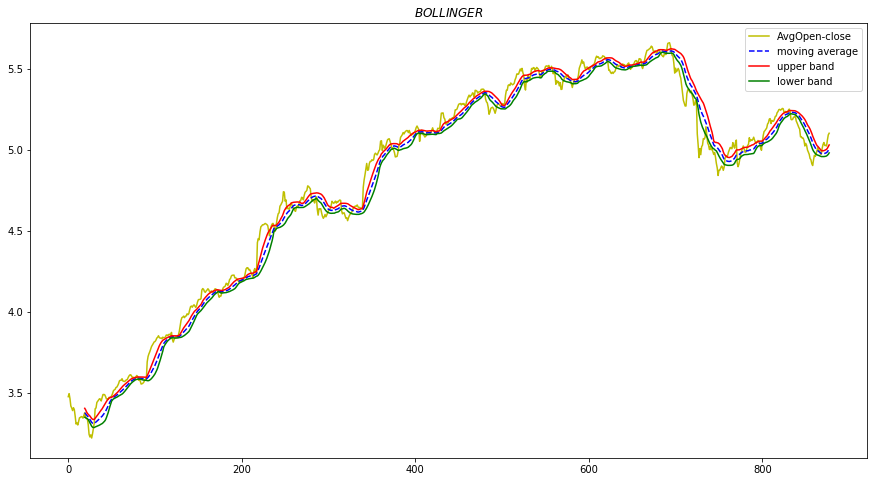

In [26]:
fig = plt.figure(figsize=(15,8))
plt.plot(data['AvgOpen-close'],'y',label = "AvgOpen-close")
plt.plot(data['moving average'],'b--',label = "moving average")
plt.plot(data['upper band'],'r',label = "upper band")
plt.plot(data['lower band'],'g',label = "lower band")
plt.title('$BOLLINGER$')
plt.legend()
plt.show()

In this section, we will discuss few aspects of Bollinger Band. This information can be used in different stock trading.

1.If an uptrend is strong, then stock touches the upper band on regular basis and remains above the middle line.This signals the strong movement towards North.

2.If downtrend is strong, then stong touches the lower band on regular basis and remains below the middle line. This signals strong southward movement.

3.During the upward trend the price should not be below the lower band otherwise it is signalling the reverse movement.

4.During the downward trend, if the price move above the upper band then it signals Northward movement.